*Importing the libraries*

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Loading the Dataset*

In [19]:
dataset = pd.read_csv('Weather Data.csv')

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 12 columns):
DateTime       3896 non-null object
Condition      3896 non-null object
Rain           3896 non-null float64
MaxTemp        3896 non-null int64
MinTemp        3896 non-null int64
SunRise        3896 non-null object
SunSet         3896 non-null object
MoonRise       3764 non-null object
MoonSet        3765 non-null object
AvgWind        3896 non-null int64
AvgHumidity    3896 non-null int64
AvgPressure    3896 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 365.3+ KB


*Removing the data with NaN values*

In [21]:
dataset.dropna(inplace =True)

In [22]:
dataset.head(3)

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
0,02.09.2019,Partly cloudy,0.0,27,22,06:32:00,19:37:00,9:52:00,21:45:00,23,66,1012
1,01.09.2019,Partly cloudy,0.0,27,22,06:31:00,19:38:00,8:37:00,21:13:00,21,66,1011
2,31.08.2019,Patchy rain possible,0.5,26,22,06:30:00,19:40:00,7:21:00,20:40:00,22,63,1015


*Extracting the required features*

In [23]:
data = dataset[['Rain','AvgWind','AvgHumidity','AvgPressure']]

In [24]:
data['temperature'] = (dataset['MinTemp']+dataset['MaxTemp'])/2

C:\Users\laksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3633 entries, 0 to 3895
Data columns (total 5 columns):
Rain           3633 non-null float64
AvgWind        3633 non-null int64
AvgHumidity    3633 non-null int64
AvgPressure    3633 non-null int64
temperature    3633 non-null float64
dtypes: float64(2), int64(3)
memory usage: 170.3 KB


In [26]:
data.describe()

,Rain,AvgWind,AvgHumidity,AvgPressure,temperature
count,3633.000000,3633.000000,3633.000000,3633.000000,3633.000000
mean,0.946689,16.974952,71.409854,1015.263969,15.949353
std,2.528564,7.945864,9.465023,6.297678,7.134826
min,0.000000,2.000000,40.000000,992.000000,-3.500000
25%,0.000000,11.000000,65.000000,1011.000000,10.000000
50%,0.020000,16.000000,71.000000,1015.000000,16.000000
75%,0.740000,22.000000,78.000000,1019.000000,22.500000
max,42.000000,56.000000,97.000000,1038.000000,30.000000


In [27]:
data['temperature'].groupby(data['AvgPressure']).describe().T

AvgPressure,992,995,997,998,999,1000,1001,1002,1003,1004,...,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038
count,1.0,2.000000,5.00000,2.000000,9.000000,7.000000,15.000000,23.000000,23.000000,43.000000,...,21.000000,24.000000,15.000000,18.000000,10.000000,6.000000,4.00000,1.0,2.00000,1.0
mean,14.0,12.500000,11.60000,11.750000,11.333333,13.928571,11.533333,14.086957,15.826087,17.744186,...,6.142857,7.666667,7.433333,4.555556,6.150000,6.000000,6.00000,4.0,4.25000,-1.5
std,NaN,3.535534,0.74162,2.474874,2.500000,2.572751,6.194660,4.806842,7.606231,7.265683,...,3.748809,3.583375,2.932982,2.661760,3.440365,5.718391,4.41588,NaN,1.06066,NaN
min,14.0,10.000000,10.50000,10.000000,8.000000,11.000000,5.000000,8.000000,4.000000,5.000000,...,-0.500000,1.500000,3.500000,0.500000,1.000000,-3.500000,-0.50000,4.0,3.50000,-1.5
25%,14.0,11.250000,11.50000,10.875000,10.000000,11.750000,8.500000,11.250000,10.250000,11.250000,...,3.500000,5.375000,5.000000,3.500000,3.750000,3.750000,5.12500,4.0,3.87500,-1.5
50%,14.0,12.500000,11.50000,11.750000,10.500000,13.500000,10.500000,13.000000,14.000000,19.000000,...,6.500000,8.000000,8.500000,4.250000,6.500000,7.250000,7.75000,4.0,4.25000,-1.5
75%,14.0,13.750000,12.00000,12.625000,13.000000,16.250000,11.750000,14.750000,21.000000,24.000000,...,8.000000,10.125000,9.250000,6.000000,8.875000,8.875000,8.62500,4.0,4.62500,-1.5
max,14.0,15.000000,12.50000,13.500000,15.500000,17.000000,26.000000,26.000000,28.500000,28.500000,...,14.500000,15.000000,13.000000,10.000000,11.000000,13.000000,9.00000,4.0,5.00000,-1.5


Text(0.5,1,'Pressure vs Temp')

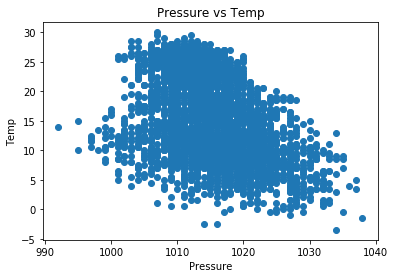

In [89]:
plt.scatter(data['AvgPressure'],data['temperature'])
plt.xlabel('Pressure')
plt.ylabel('Temp')
plt.title('Pressure vs Temp')

Text(0.5,1,'Wind vs Temp')

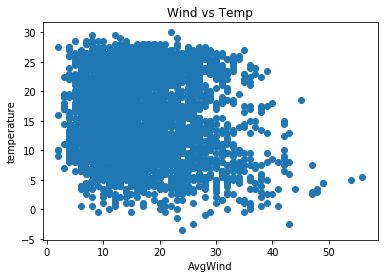

In [90]:
plt.scatter(data['AvgWind'],data['temperature'])
plt.xlabel('AvgWind')
plt.ylabel('temperature')
plt.title('Wind vs Temp')

Text(0.5,1,'Humidity vs Temp')

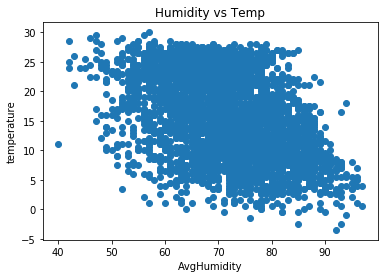

In [91]:
plt.scatter(data['AvgHumidity'],data['temperature'])
plt.xlabel('AvgHumidity')
plt.ylabel('temperature')
plt.title('Humidity vs Temp')

Text(0,0.5,'Temperature')

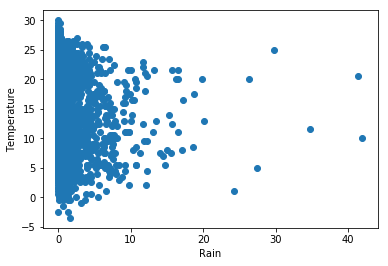

In [31]:
plt.scatter(data['Rain'],data['temperature'])
plt.xlabel('Rain')
plt.ylabel('Temperature')

*splitting the data into dependent variable and independent variables*

In [32]:
X = data.iloc[:,:4].values

In [33]:
X

array([[0.000e+00, 2.300e+01, 6.600e+01, 1.012e+03],
       [0.000e+00, 2.100e+01, 6.600e+01, 1.011e+03],
       [5.000e-01, 2.200e+01, 6.300e+01, 1.015e+03],
       ...,
       [2.910e+00, 9.000e+00, 9.400e+01, 1.014e+03],
       [4.480e+00, 1.200e+01, 8.900e+01, 1.021e+03],
       [2.300e-01, 1.000e+01, 9.000e+01, 1.027e+03]])

In [34]:
y = data.iloc[:,4]

In [35]:
y

0       24.5
1       24.5
2       24.0
3       24.5
4       25.0
5       26.0
6       27.0
7       27.0
8       27.0
9       27.0
11      26.5
12      24.5
13      24.5
14      24.0
15      23.5
16      21.5
17      24.5
18      25.5
19      26.5
20      26.5
21      26.5
22      25.5
23      26.5
24      26.0
25      26.0
27      25.0
28      25.0
29      24.5
30      29.5
31      27.0
        ... 
3863     7.0
3865     4.5
3866     5.5
3867     8.0
3868    10.0
3869    12.0
3870    11.5
3871    11.5
3872    11.5
3873    10.5
3874    12.0
3875    11.0
3876    10.0
3877     6.0
3878     4.0
3879     4.0
3881    11.0
3882     5.5
3883     5.0
3884     4.0
3885     3.0
3886     2.5
3887     1.5
3888     4.5
3889     4.5
3890     4.0
3891     4.0
3892     4.0
3894     2.5
3895     3.5
Name: temperature, Length: 3633, dtype: float64

*Splitting the data into training and testing*

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.8)

C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [37]:
X_train

array([[2.620e+00, 1.100e+01, 8.600e+01, 1.008e+03],
       [1.530e+00, 1.400e+01, 8.400e+01, 1.017e+03],
       [6.000e-02, 8.000e+00, 6.400e+01, 1.010e+03],
       ...,
       [3.140e+00, 7.000e+00, 8.100e+01, 1.005e+03],
       [2.400e+00, 1.000e+01, 6.100e+01, 1.014e+03],
       [1.100e-01, 2.700e+01, 7.200e+01, 1.022e+03]])

In [38]:
from sklearn.linear_model import LinearRegression

*Creating linear regression model*

In [39]:
regressor = LinearRegression()

In [72]:
regressor.fit(X_train[:,3].reshape(-1,1),y_train)
y_pred =regressor.predict(X_test[:,3].reshape(-1,1))
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.20969478918260342

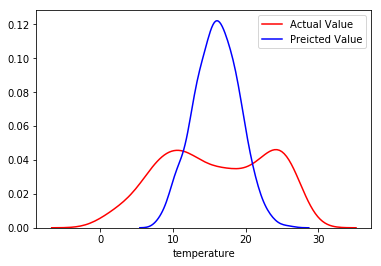

In [73]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred,color ="b",hist = False,label = "Preicted Value",ax =ax1)

Text(0.5,1,'Pressure vs temp')

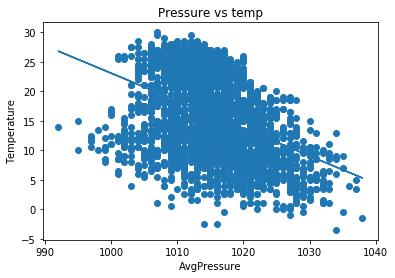

In [76]:
plt.scatter(X_train[:,3],y_train)
plt.plot(X_train[:,3],regressor.predict(X_train[:,3].reshape(-1,1)))
plt.xlabel('AvgPressure')
plt.ylabel('Temperature')
plt.title('Pressure vs temp')

In [74]:
regressor.fit(X_train[:,1].reshape(-1,1),y_train)
y_pred =regressor.predict(X_test[:,1].reshape(-1,1))
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.029487833614168513

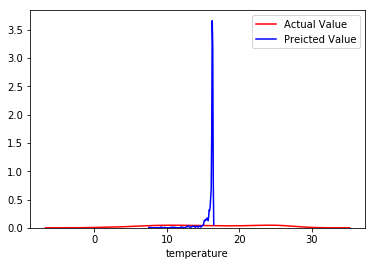

In [76]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred,color ="b",hist = False,label = "Preicted Value",ax =ax1)

Text(0.5,1,'Wind vs temp')

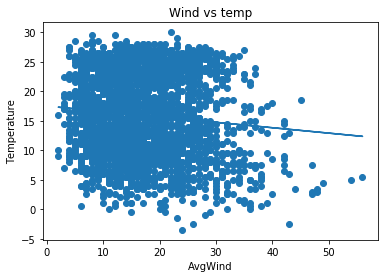

In [84]:
plt.scatter(X_train[:,1],y_train)
plt.plot(X_train[:,1],regressor.predict(X_train[:,1].reshape(-1,1)))
plt.xlabel('AvgWind')
plt.ylabel('Temperature')
plt.title('Wind vs temp')

In [77]:
regressor.fit(X_train[:,2].reshape(-1,1),y_train)
y_pred =regressor.predict(X_test[:,2].reshape(-1,1))
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.008296338162175454

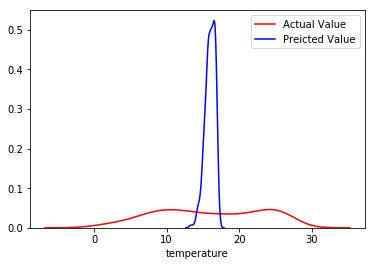

In [78]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred,color ="b",hist = False,label = "Preicted Value",ax =ax1)

Text(0.5,1,'Humidity vs temp')

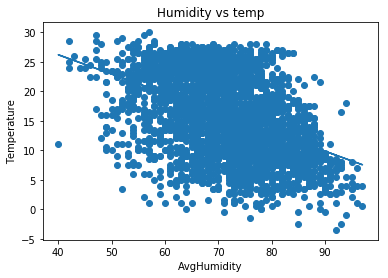

In [86]:
plt.scatter(X_train[:,2],y_train)
plt.plot(X_train[:,2],regressor.predict(X_train[:,2].reshape(-1,1)))
plt.xlabel('AvgHumidity')
plt.ylabel('Temperature')
plt.title('Humidity vs temp')

In [82]:
regressor.fit(X_train[:,0].reshape(-1,1),y_train)
y_pred =regressor.predict(X_test[:,0].reshape(-1,1))
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.0002687915548265085

C:\Users\laksh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\laksh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


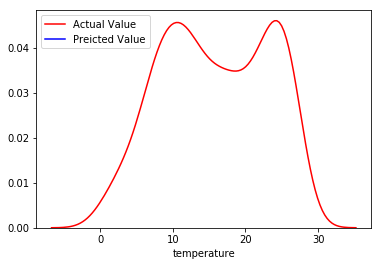

In [83]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred,color ="b",hist = False,label = "Preicted Value",ax =ax1)

Text(0.5,1,'Rain vs temp')

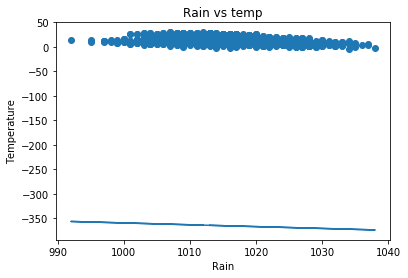

In [89]:
plt.scatter(X_train[:,3],y_train)
plt.plot(X_train[:,3],regressor.predict(X_train[:,3].reshape(-1,1)))
plt.xlabel('Rain')
plt.ylabel('Temperature')
plt.title('Rain vs temp')

*Multi Linear Regression Model*

In [54]:
regressor.fit(X_train[:,2:4],y_train)
y_pred =regressor.predict(X_test[:,2:4])
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3544621840127743

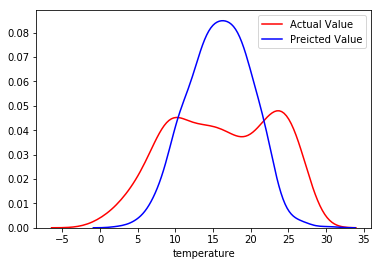

In [55]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred,color ="b",hist = False,label = "Preicted Value",ax =ax1)

*Decision Tree Regression Model*

In [56]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [57]:
regressor.fit(X_train[:,2:4],y_train)
y_pred =regressor.predict(X_test[:,2:4])
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.26581449296393367

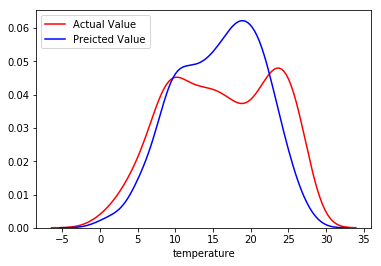

In [58]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred,color ="b",hist = False,label = "Preicted Value",ax =ax1)

*Random Forest Regression Model*

In [59]:
from sklearn.ensemble import RandomForestRegressor as RFR
regressor = RFR()

In [60]:
regressor.fit(X_train[:,2:4],y_train)
y_pred =regressor.predict(X_test[:,2:4])
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3222706424298324

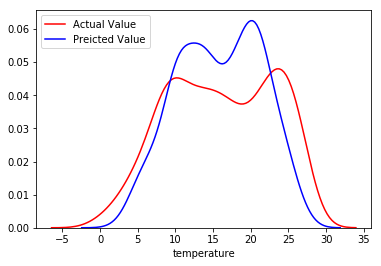

In [61]:
import seaborn as sns
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred,color ="b",hist = False,label = "Preicted Value",ax =ax1)

*Support Vector Regression Model*

In [62]:
from sklearn.svm import SVR
regressor = SVR()

In [65]:
regressor.fit(X_train[:,2:4],y_train)
y_pred =regressor.predict(X_test[:,2:4])
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3660063661515649

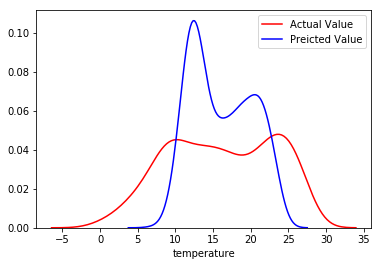

In [66]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred,color ="b",hist = False,label = "Preicted Value",ax =ax1)

*Polynomial Regression Model*

In [67]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 5) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y)  

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,train_size =0.8)

C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [69]:
regressor = LinearRegression()
regressor.fit(X_train[:,2:4],y_train)
y_pred =regressor.predict(X_test[:,2:4])
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.20959780506764414

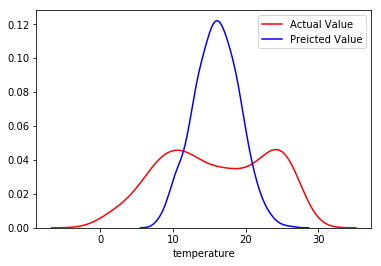

In [70]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred,color ="b",hist = False,label = "Preicted Value",ax =ax1)

In [117]:
'''
   from sklearn.preprocessing import StandardScaler
   ss = StandardScaler()
   ss.fit_transform(X_train)
   ss.fit(X_test)
'''

'\n   from sklearn.preprocessing import StandardScaler\n   ss = StandardScaler()\n   ss.fit_transform(X_train)\n   ss.fit(X_test)\n'

In [119]:
'''
from sklearn.preprocessing import Imputer
impute_x = Imputer()
X = impute_x.fit_transform(x)
'''

'\nfrom sklearn.preprocessing import Imputer\nimpute_x = Imputer()\nX = impute_x.fit_transform(x)\n'

*Ridge Regression Model*

In [84]:
from sklearn.linear_model import Ridge
new_regressor= Ridge(alpha=1.0)
new_regressor.fit(X_train,y_train)
y_pred= new_regressor.predict(X_test)

C:\Users\laksh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.473138e-31
  overwrite_a=True).T


In [85]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4531405885851859

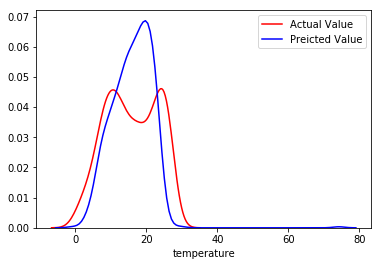

In [86]:
ax1 = sns.distplot(y_test,hist=False,color ="r",label ="Actual Value")
sns.distplot(y_pred,color ="b",hist = False,label = "Preicted Value",ax =ax1)